In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('perc_remote_t28.csv') 

COMMIT_ALG     ONE_PC    TWO_PC
PERC_REMOTE                    
0.00         9663.246  9155.212
0.01         8688.384  8852.304
0.02         8468.578  8018.820
0.04         7637.652  6284.020
0.06         6836.728  5847.080
0.08         6468.988  5218.784
0.10         5951.320  4956.342


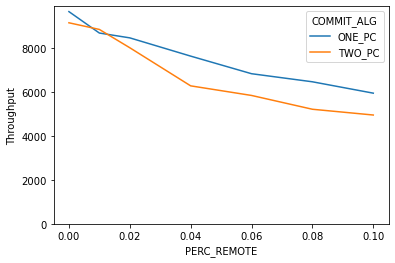

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'PERC_REMOTE'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='PERC_REMOTE', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
plot.set_xlabel("PERC_REMOTE")
plot.set_ylim(bottom=0)
fig = plot.get_figure()
fig.savefig("pr_ssd_t28.png")


In [15]:
latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-15-6e4f263a5f2d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['average_latency', 'average_local_latency', 'average_distributed_latency'].mean().reset_index()


   COMMIT_ALG  PERC_REMOTE  average_latency  average_local_latency  \
6      ONE_PC          0.1         0.003315               0.002232   
13     TWO_PC          0.1         0.004193               0.002262   

    average_distributed_latency  
6                      0.003561  
13                     0.004615  


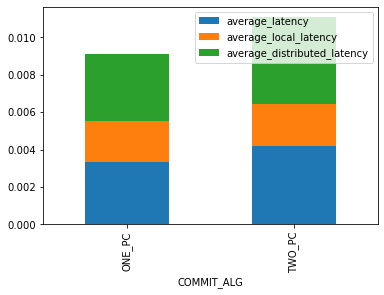

In [16]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_pr_std.png")

In [34]:
latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['PERC_REMOTE'] == 0.1]

<ipython-input-34-1b1d8e42c01b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  PERC_REMOTE  execute_phase (in us)  prepare_phase_1 (in us)  \
6      ONE_PC          0.1               455.9710                 2856.724   
13     TWO_PC          0.1               382.5326                 2710.210   

    prepare_phase_2 (in us)  commit_phase (in us)  abort (in us)  
6                  0.158580              1.491404       0.248939  
13                 0.221541           1099.904000       0.623804  


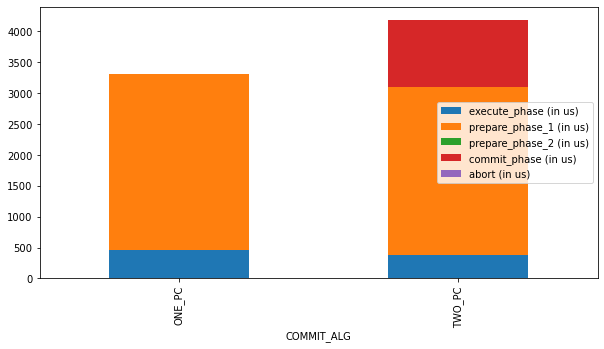

In [35]:
print(result)
result = result.drop(['PERC_REMOTE'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.set_size_inches(10, 5)
fig.savefig("phase_breakdown.png")